# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2023-07-20 21:52:07.957561: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-20 21:52:07.960480: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-20 21:52:08.036997: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-20 21:52:08.039028: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 21:52:09.718877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

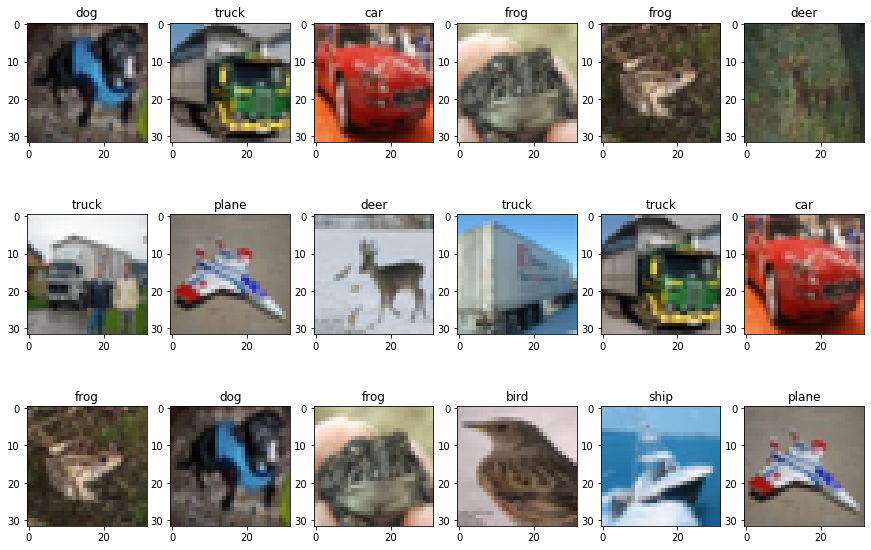

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

In [3]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

Yes, it is balanced.

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [4]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [5]:
# Dataset params
num_classes = 10
size = x_train.shape[1]

# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0     

### Step 3: Training

Compile the model and train it.

In [6]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
352/352 [==============================] - 11s 26ms/step - loss: 1.7281 - accuracy: 0.3835 - val_loss: 1.5242 - val_accuracy: 0.4618
Epoch 2/25
352/352 [==============================] - 9s 25ms/step - loss: 1.4187 - accuracy: 0.5005 - val_loss: 1.3367 - val_accuracy: 0.5298
Epoch 3/25
352/352 [==============================] - 9s 25ms/step - loss: 1.3044 - accuracy: 0.5436 - val_loss: 1.2627 - val_accuracy: 0.5532
Epoch 4/25
352/352 [==============================] - 8s 24ms/step - loss: 1.2263 - accuracy: 0.5712 - val_loss: 1.2009 - val_accuracy: 0.5764
Epoch 5/25
352/352 [==============================] - 9s 24ms/step - loss: 1.1740 - accuracy: 0.5918 - val_loss: 1.1637 - val_accuracy: 0.6016
Epoch 6/25
352/352 [==============================] - 9s 24ms/step - loss: 1.1283 - accuracy: 0.6078 - val_loss: 1.1116 - val_accuracy: 0.6184
Epoch 7/25
352/352 [==============================] - 9s 25ms/step - loss: 1.0928 - accuracy: 0.6225 - val_loss: 1.1122 - val_accuracy: 0.614

Train Acc      0.7094444632530212
Validation Acc 0.6647999882698059


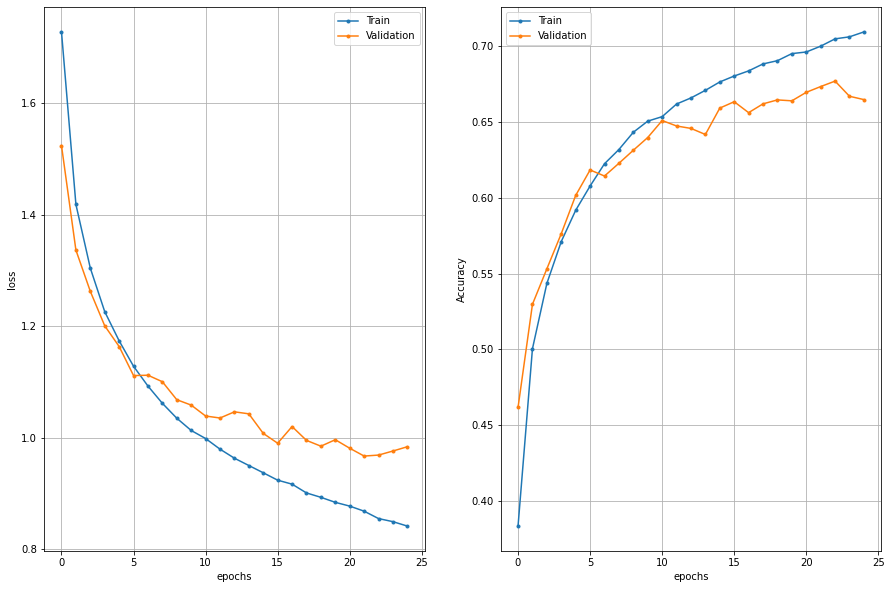

In [7]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [8]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [9]:
# Compute and print the accuracy for each class
y_pred = np.argmax(y_pred, axis=1)

for class_id, class_name in classes.items():
    mask = y_true == class_id
    
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    acc = tp/total
    print(class_name, acc)

plane 0.745
car 0.833
bird 0.59
cat 0.477
deer 0.488
dog 0.602
frog 0.663
horse 0.758
ship 0.717
truck 0.713


In [10]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.9997 - accuracy: 0.6586
Test loss   0.9996697306632996
Test metric 0.6585999727249146


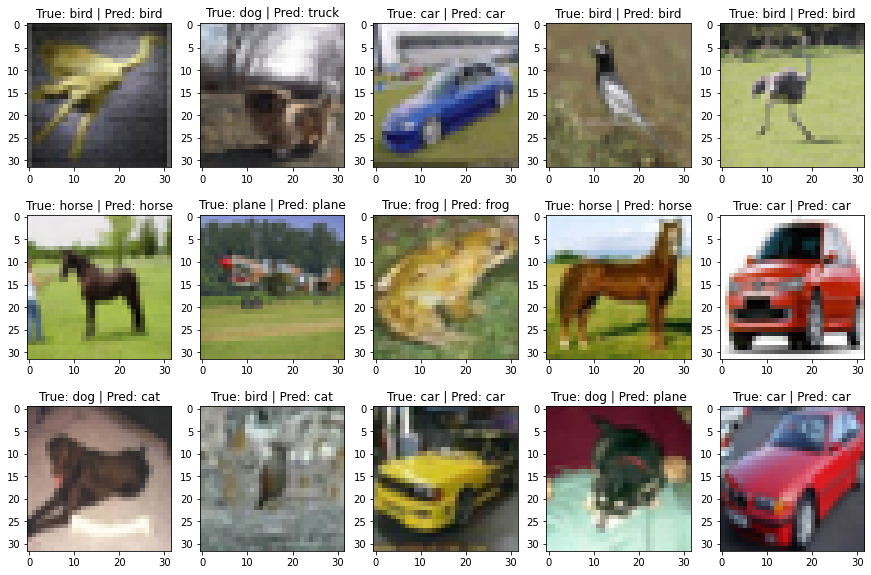

In [11]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?

Overall accuracy is 0.6586

* What modifications would you do in order to improve the classification accuracy?

May be we can increase accurancy by adding more layers or investigate which actiwation function is better. I would like to increace count of epoches, because in last homework I used count of epoches ~ 100

UPD. I got overfitting and used Dropout for fix that

* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

Accuracy improved 0.6810

Epoch 1/25
352/352 [==============================] - 3s 9ms/step - loss: 1.8131 - accuracy: 0.3443 - val_loss: 1.5841 - val_accuracy: 0.4392
Epoch 2/25
352/352 [==============================] - 3s 9ms/step - loss: 1.4915 - accuracy: 0.4684 - val_loss: 1.3754 - val_accuracy: 0.5192
Epoch 3/25
352/352 [==============================] - 3s 9ms/step - loss: 1.3836 - accuracy: 0.5081 - val_loss: 1.3019 - val_accuracy: 0.5508
Epoch 4/25
352/352 [==============================] - 3s 9ms/step - loss: 1.3104 - accuracy: 0.5395 - val_loss: 1.2243 - val_accuracy: 0.5854
Epoch 5/25
352/352 [==============================] - 5s 14ms/step - loss: 1.2558 - accuracy: 0.5606 - val_loss: 1.1714 - val_accuracy: 0.5976
Epoch 6/25
352/352 [==============================] - 5s 14ms/step - loss: 1.2155 - accuracy: 0.5756 - val_loss: 1.1354 - val_accuracy: 0.6130
Epoch 7/25
352/352 [==============================] - 5s 13ms/step - loss: 1.1771 - accuracy: 0.5909 - val_loss: 1.1118 - val_accuracy: 0.6196
Epo

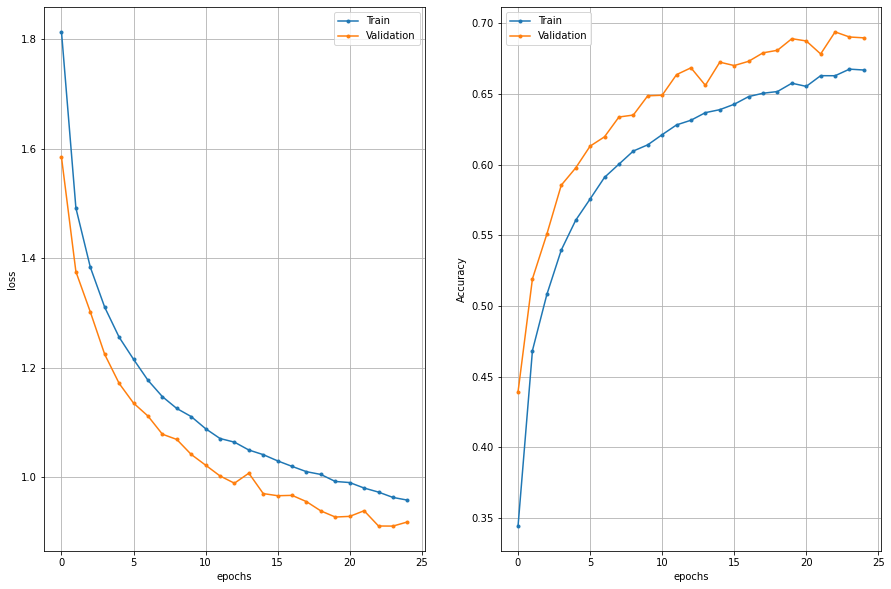

In [24]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D

# Dataset params
num_classes = 10
size = x_train.shape[1]

# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.2)(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

# Compute and print the accuracy for each class
y_pred = np.argmax(y_pred, axis=1)

for class_id, class_name in classes.items():
    mask = y_true == class_id
    
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    acc = tp/total
    print(class_name, acc)

# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])